 # Investigation dataset of No_show_appointment
 **Introduction:**this dataset collect informations about medical appointment in BRAZIL . it show some features of the patients asking for that      medical appointment,also it provide information whether the patient attend that appointment or not. The main goal of this investigation to try answering why patients not attend the appointment which they ask for.
this dataset has columns labeled with patient id,appointment id,neighbourhood(hospital location),patient age,patient gender,scholarship(whether the patient is enrolled in brazillian welfare program or not),sheduled day(the day that patient make a request for an appointment),appointment day,hipertension(whether patient is hypertensive or not),diabetes(whether diabetic or not),alcoholism,handcaped,SMS (recieved or not) and "no_show" column which has value of "No" if patient attend the appointment or value of "Yes" if patient not attend.
 

__Aim of investigation:__ answer question,why did patients not attend their medical appointment?

## _**cleaning & assess**_

In [50]:
#here I import all modules that are needed to make statistic analysis for that dataset to find out the answer to the our qustion.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
#with the neext codes we let pandas read the dataset csv file and show it to be inspected for nan value,duplicated rows or wrong data.
df= pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


_**reporting the above-step finding:**_ we need to convert column to lowercase letter and replace'-' with '_'. correction was done with code of the following cell

In [52]:
# code to rename columns label
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [53]:
#code to find out total number rows,columns,null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


_**step finding:**_
    1) no missed value
    2)patientid and appointmentid values are float-datatype,int-datatype respectively
    3)scheduledday and appointmentday values are object typedata
    4)dataset has data from 110527 appointments(rows) with 14 features(columns)

In [54]:
#code to find out number of duplicated rows in dataframe
sum(df.duplicated())

0

_**step finding:**_ there is no duplicated rows

In [55]:
#code to find out number of unique values of columns
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no_show                2
dtype: int64

_**step finding:**_ patientid is less than appointmentid,this means that some patient have many appointments(may be they are chronic patient and in need periodic evaluations),also there is a huge differrence between unique nomber of scheduledday and appointmentday(this is because time is included in scheduledday but time has constant value(00:00:00) within appointmentday

In [56]:
# code to do statstical description of data
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


_**step finding:**_ the minimum value of age is less than zero. this a wrong input and inspected with the followin cell code. because its "no_show" value is 'No' (means the appointment was done),so we can drop it.

In [57]:
#code to locate the age value == 1
df.query('age == "-1"')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [58]:
#change 'patientid' datatype to str.
df['patientid']=df['patientid'].astype(str)
#drop 'appointmrnt' column.
df.drop(['appointmentid'], axis=1,inplace=True)
#drop the row in which the "age" value = -1
df.drop(df.query('age == "-1"').index,axis = 0, inplace=True)
#change "scheduledday" and "appointmentday" datatype to datetime format then to date format
df['scheduledday']= pd.to_datetime(df['scheduledday']).dt.normalize()
df['appointmentday']= pd.to_datetime(df['appointmentday']).dt.normalize()
# add new column of "lag" label with int. datatype
df['lag']=(df['appointmentday']-df['scheduledday']).dt.days



_**step report:**_    we do the following: 1)change datatype of patientid to str. 2)drop appointmentday column 3)drop the wrong value of age  4)change datatype of scheduledday and appointmentday to datetime format then to date format to remove time from both columns 5 )add new column labed "lag" to calculate the duration between scheduled day and appointment day

In [59]:
# check correction through the following codes

In [60]:
df.nunique()

patientid         62298
gender                2
scheduledday        111
appointmentday       27
age                 103
neighbourhood        81
scholarship           2
hipertension          2
diabetes              2
alcoholism            2
handcap               5
sms_received          2
no_show               2
lag                 131
dtype: int64

In [61]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,lag
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.183794
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.255034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null object
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns]
appointmentday    110526 non-null datetime64[ns]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
no_show           110526 non-null object
lag               110526 non-null int64
dtypes: datetime64[ns](2), int64(8), object(4)
memory usage: 12.6+ MB


_**Exploring data and visualization**_

In [63]:
# categorize "age" into four groups to facilitate analysis age values with "no_show" values by using minimum,maximum,median,IQR1,IQR3
bin_edges=[-1,18,37,55,115]
bin_names=['young','young_adult','adult','elder']
df['age_category']=pd.cut(df['age'],bin_edges,labels=bin_names)
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag,age_category
0,2.98724998243e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,elder
1,5.58997776694e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,elder
2,4.26296229995e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,elder
3,867951213174.0,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,young
4,8.84118644818e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,elder


In [64]:
# make to dataframe one for each subgroups of "no_show""
attendance=df.loc[df['no_show'] == 'No']
abscence=df.loc[df['no_show']== 'Yes']
attendance

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag,age_category
0,2.98724998243e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,elder
1,5.58997776694e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,elder
2,4.26296229995e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,elder
3,867951213174.0,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,young
4,8.84118644818e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,elder
5,9.59851332313e+13,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2,elder
8,5.639472995e+13,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,young_adult
9,7.81245643693e+13,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2,young_adult
10,7.34536231958e+14,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2,young_adult
12,5.66654781423e+14,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No,1,young_adult


In [65]:
abscence

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag,age_category
6,7.33688164477e+14,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,young_adult
7,3.44983339412e+12,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,adult
11,7.54295136844e+12,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,young_adult
17,1.47949661912e+13,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1,adult
20,6.22257462899e+14,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,young_adult
21,1.21548437528e+13,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,2,young
22,8.63229818888e+14,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,4,young
31,311284853849.0,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,2,young
44,274164858852.0,F,2016-04-28,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,1,elder
48,8.54541517699e+12,F,2016-04-26,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,3,elder


In [107]:
# design a function to show relationbetween one column and value counts of another,and also plot it
def plot_value_counts(v1,v2):
    value_counts=df.groupby(v1)[v2].value_counts()
    value_counts_plot=df.groupby(v1)[v2].value_counts().plot(kind='bar',figsize=(15,15),title='{} finding by {} value_counts'.format(v1,v2));
    plt.xlabel('{},{}'.format(v1,v2),fontsize=15);
    plt.ylabel('counts',fontsize=15);
    print(value_counts,value_counts_plot)
    return

In [108]:
# explore count of 'no_show' subgroups

In [109]:
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

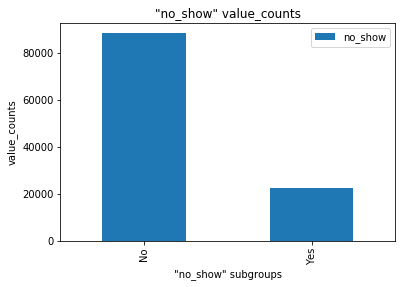

In [110]:
df.no_show.value_counts().to_frame().plot(kind='bar',title= '"no_show" value_counts');
plt.xlabel('"no_show" subgroups');
plt.ylabel('value_counts');

_**finding**_ majority of patient attend their appointment, attendace is up to 4 times of abscence,but still the abscence is of huge value.

In [111]:
# explore statistics of lag

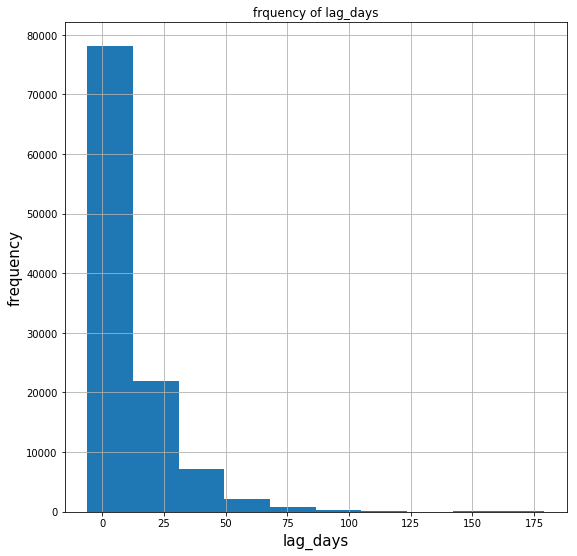

In [112]:
df.lag.hist(figsize=(9,9));
plt.title('frquency of lag_days');
plt.xlabel('lag_days',fontsize=15);
plt.ylabel('frequency',fontsize=15);

In [113]:
df.lag.describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lag, dtype: float64

In [114]:
# locate lag values less than zero
df.query('lag < 0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,lag,age_category
27033,7.83927266175e+12,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1,adult
55226,7.89629396787e+12,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1,young_adult
64175,2.425225839e+13,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1,young_adult
71533,9.98231581612e+14,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6,elder
72362,3.78748196682e+12,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1,young


In [115]:
df.groupby(['no_show'])['lag'].mean()

no_show
No      8.754759
Yes    15.831489
Name: lag, dtype: float64

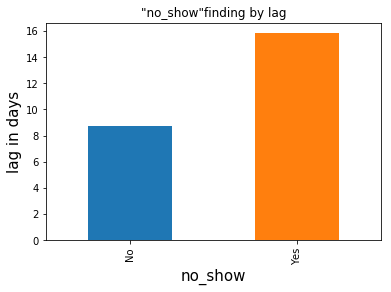

In [116]:
df.groupby(['no_show'])['lag'].mean().plot(kind='bar',title='"no_show"finding by lag');
plt.xlabel('no_show',fontsize=15);
plt.ylabel('lag in days',fontsize=15);


_**finding**_ histogram and statistical description of lag days values showing skewing to right,mean is near to 10 days, minimum value is -6 (this means that the appointment day is before the scheduled day by 6 days and this invalid input or  wrong appointment day ,but by location of lag values that less than zero, 5 values was found to be less than zero and all of them with "no_show" values denoting that appointments are not done and increase the possibility of wrong appointment.)also we can notice that 50% of lag days values are located between 4 days and 179 days.these are extremly long period for any one seeking medical advice. 

In [117]:
# explore statistics of age

In [118]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

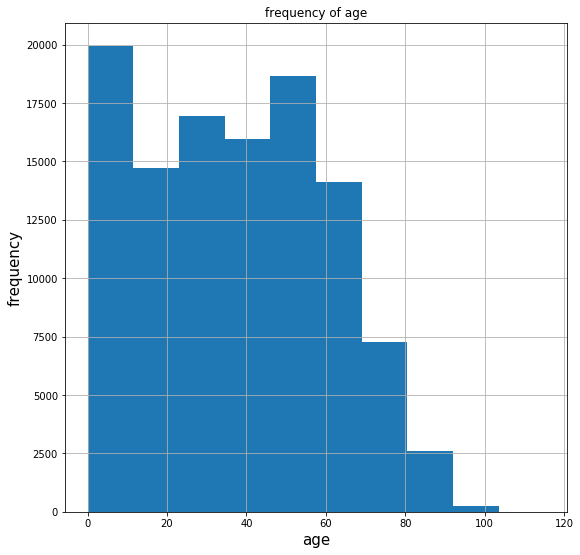

In [119]:
df.age.hist(figsize=(9,9));
plt.title('frequency of age');
plt.xlabel('age',fontsize=15);
plt.ylabel('frequency',fontsize=15);

In [120]:
df.age_category.describe()

count     110526
unique         4
top        young
freq       28866
Name: age_category, dtype: object

(no_show  age_category
No       elder           23201
         young           22519
         adult           21651
         young_adult     20836
Yes      young_adult      6414
         young            6347
         adult            5255
         elder            4303
Name: age_category, dtype: int64, <matplotlib.axes._subplots.AxesSubplot object at 0x7f8901ca3150>)


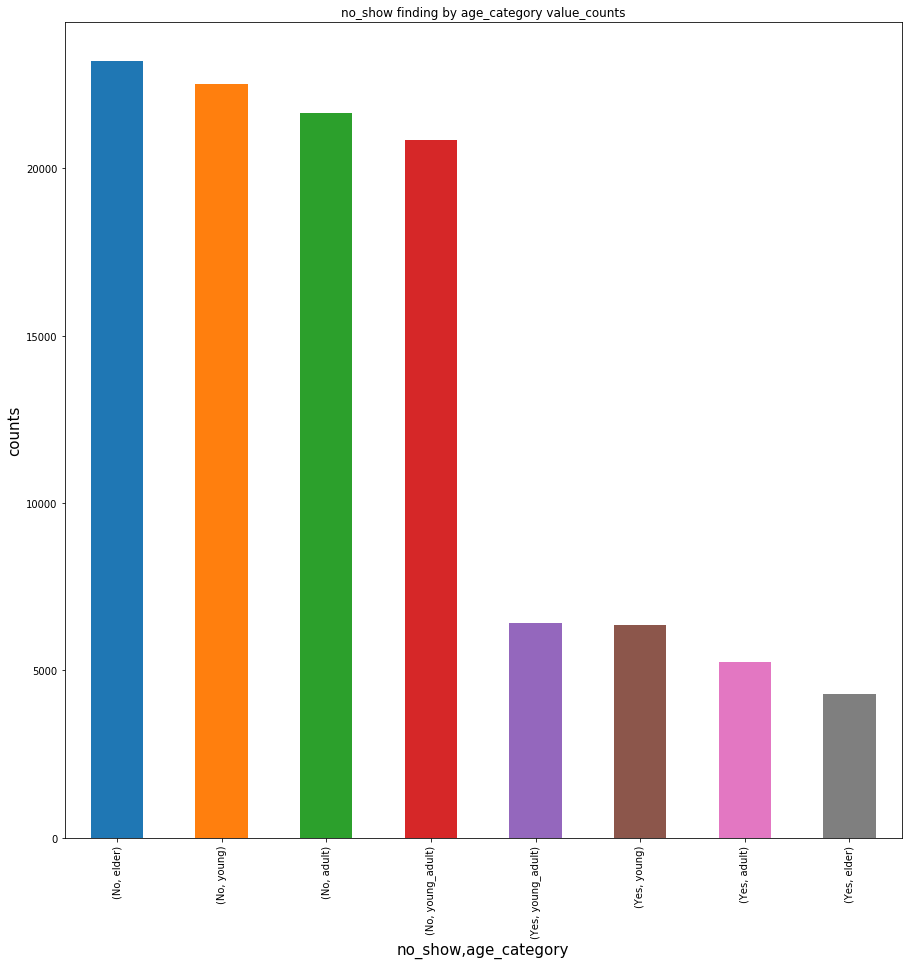

In [121]:
plot_value_counts('no_show','age_category')

In [122]:
age_category_attendance= attendance.groupby(['age_category'])['lag'].mean()
age_category_attendance

age_category
young           7.808695
young_adult     8.208965
adult           8.886379
elder          10.040343
Name: lag, dtype: float64

In [123]:
age_category_abscence=abscence.groupby(['age_category'])['lag'].mean()
age_category_abscence

age_category
young          15.652119
young_adult    15.968506
adult          15.640723
elder          16.124797
Name: lag, dtype: float64

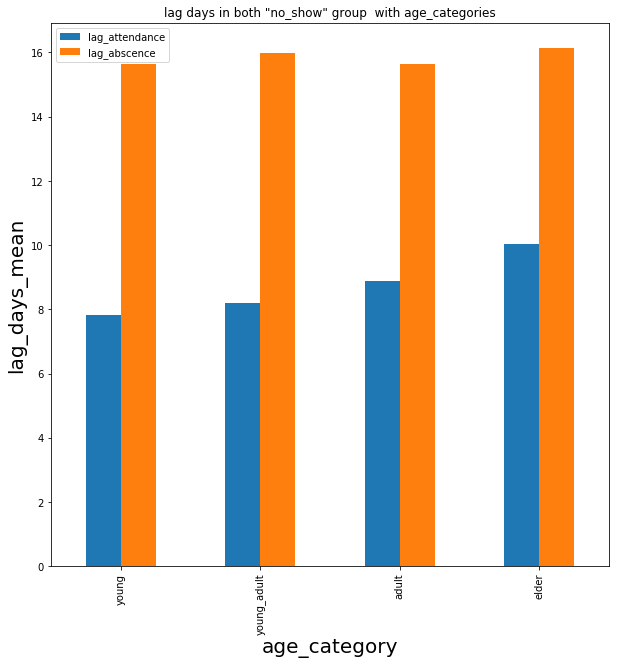

In [127]:
g=pd.concat([age_category_attendance,age_category_abscence],axis=1)
g.set_axis(['lag_attendance','lag_abscence'],axis=1,inplace=True)
g.plot(kind='bar',figsize=(10,10),title='lag days in both "no_show" group  with age_categories');
plt.xlabel('age_category',fontsize=20);
plt.ylabel('lag_days_mean',fontsize=20);
plt.legend();

_**finding**_ histogram and statistical description of age values show right skewing of histogram,  mean of age is 37 years, minimum value is 0(means newborn),maximum is 115 and median is 37 years. 50% of patient age are between 37 and 115 years.categorization the patients into 4 groups young(0:18 years),young adult(18:37 years),adult(37:55 years) and elder group(55:115 years).

In [128]:
# statistical analysis of neighbourhood

In [129]:
# explore the relation between "neighbourhood" and value counts of "no_show" subgroups.explore the result in dataframe form
df.neighbourhood.value_counts().to_frame('value_counts').sort_index()

,value_counts
AEROPORTO,8
ANDORINHAS,2262
ANTÔNIO HONÓRIO,271
ARIOVALDO FAVALESSA,282
BARRO VERMELHO,423
BELA VISTA,1907
BENTO FERREIRA,858
BOA VISTA,312
BONFIM,2773
CARATOÍRA,2565


In [130]:
# make a dataframe for value counts of "neighbourhood" in abscence dataframe,the value in this dataframe are sorted ascendingly.
ab_n=abscence.neighbourhood.value_counts().to_frame('value_counts').sort_index()
ab_n

,value_counts
AEROPORTO,1
ANDORINHAS,521
ANTÔNIO HONÓRIO,50
ARIOVALDO FAVALESSA,62
BARRO VERMELHO,91
BELA VISTA,384
BENTO FERREIRA,193
BOA VISTA,58
BONFIM,550
CARATOÍRA,591


In [131]:
# make a dataframe for the relation between "neighbourhood" the mean of lag in abscence dataframe
lag_mean=abscence.groupby(['neighbourhood'])['lag'].mean().to_frame('lag_mean').sort_index()
lag_mean

,lag_mean
neighbourhood,
AEROPORTO,17.000000
ANDORINHAS,13.690979
ANTÔNIO HONÓRIO,17.540000
ARIOVALDO FAVALESSA,11.080645
BARRO VERMELHO,10.175824
BELA VISTA,10.653646
BENTO FERREIRA,10.678756
BOA VISTA,9.258621
BONFIM,13.307273


In [132]:
# explore value counts of "neighbourhood" of the main datafram in the format of dataframe
total_neighbourhood_appointment=df.neighbourhood.value_counts().to_frame('value_counts').sort_index()
total_neighbourhood_appointment

,value_counts
AEROPORTO,8
ANDORINHAS,2262
ANTÔNIO HONÓRIO,271
ARIOVALDO FAVALESSA,282
BARRO VERMELHO,423
BELA VISTA,1907
BENTO FERREIRA,858
BOA VISTA,312
BONFIM,2773
CARATOÍRA,2565


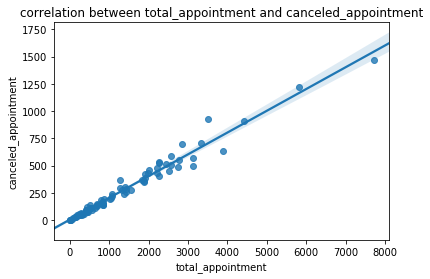

In [134]:
# make a new dataframe to study and plot correlation between value counts of "neighbourhood" of abscence group and its value counts in the main dataframe(total appointment for "neighbourhood")  
# also study correlation between total appointments of neighbourhood and corrsponding mean of lag time
ab_n['total_appointment']=total_neighbourhood_appointment['value_counts']
ab_n['mean_lag']=lag_mean['lag_mean']
ab_n.rename(columns={'value_counts':'canceled_appointment'}, inplace= True)
ab_n.sort_values(by=['canceled_appointment'], ascending= False, inplace= True);
sns.regplot(y=ab_n['canceled_appointment'],x=ab_n['total_appointment']);
plt.title('correlation between total_appointment and canceled_appointment');

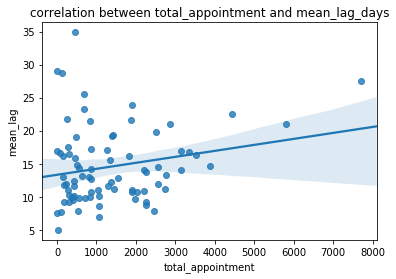

In [135]:
sns.regplot(y=ab_n['mean_lag'],x=ab_n['total_appointment']);
plt.title('correlation between total_appointment and mean_lag_days');

In [136]:
ab_n.corr()

,canceled_appointment,total_appointment,mean_lag
canceled_appointment,1.000000,0.985297,0.221930
total_appointment,0.985297,1.000000,0.216663
mean_lag,0.221930,0.216663,1.000000


__**step result**__ there is strong positive correlation between total counts of appointments for a given hospital and counts of appointments that not done.but the correlation with lag time is weak positive

In [137]:
# explore statistics for hypertension,diabetes,alcoholism,handcap,sms_received,scholarship

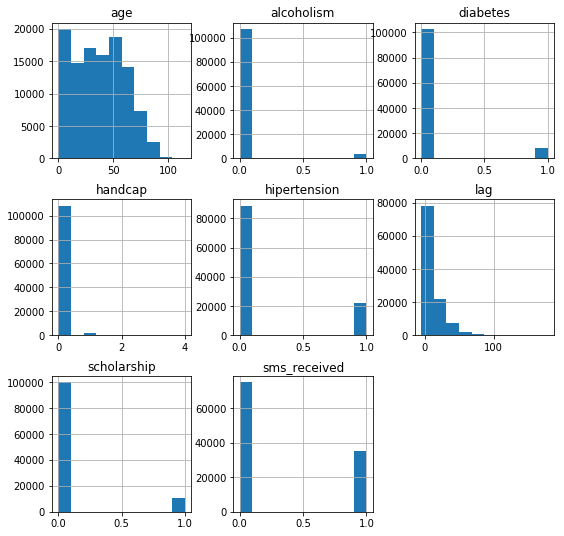

In [138]:
df.hist(figsize=(9,9));

In [139]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,lag
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.183794
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15.255034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


_**finding**_ from bar chart and stastical description for hipertension,diabetes,alcoholism,handcap,scholarship and sms,following are found: about 32% of patient recieved SMS,more than 90% of patient not enrolled in welfare program,more than 97% of not hancapped,80% not hypertensive,93% not diabetic and 97% not with alcoholism.

In [140]:
# explore relation between 'no_show'subgroup and gender value_count

(no_show  gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: gender, dtype: int64, <matplotlib.axes._subplots.AxesSubplot object at 0x7f89019c3450>)


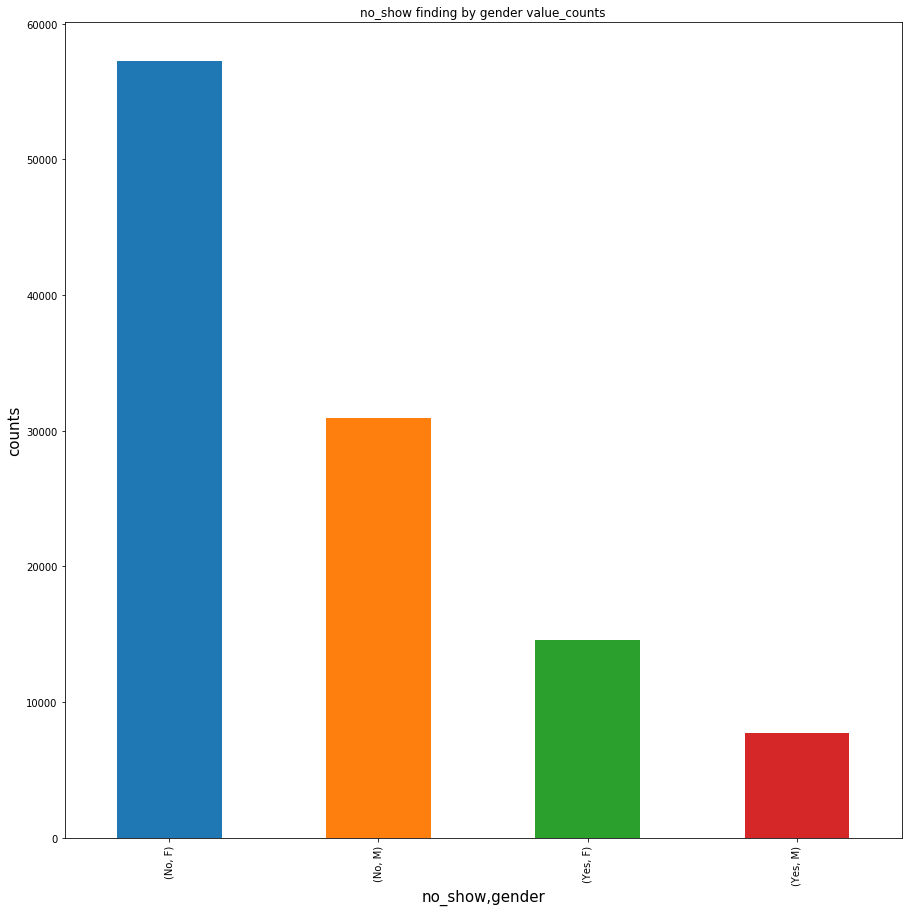

In [141]:
plot_value_counts('no_show','gender')

_**finding**_ count of female in both 'no_show' subgroups is more than count of male and this most probably due to the total female pateient is higher than that of male patient.

In [142]:
# explore relation between subgroups of 'no_show' and value count of sms_received value counts

(no_show  sms_received
No       0               62509
         1               25698
Yes      0               12535
         1                9784
Name: sms_received, dtype: int64, <matplotlib.axes._subplots.AxesSubplot object at 0x7f89019cba90>)


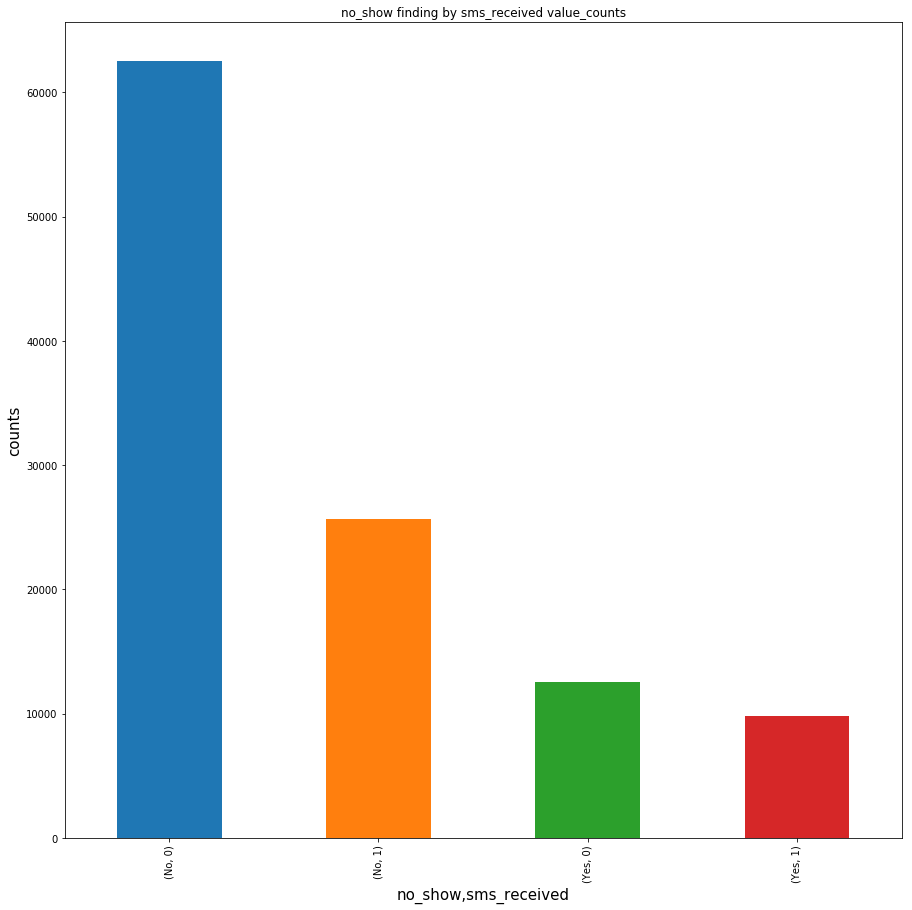

In [143]:
plot_value_counts('no_show','sms_received')

__**step result**_ although only about to 32% of patients receive SMS to confirm appointment,about 27% of them not attend and this equal to the percentage of non_attendance for patient not receive SMS.

In [144]:
# explore relation between subgroups of 'no_show' and value count of scholarship value counts

(no_show  scholarship
No       0              79924
         1               8283
Yes      0              19741
         1               2578
Name: scholarship, dtype: int64, <matplotlib.axes._subplots.AxesSubplot object at 0x7f8901682f90>)


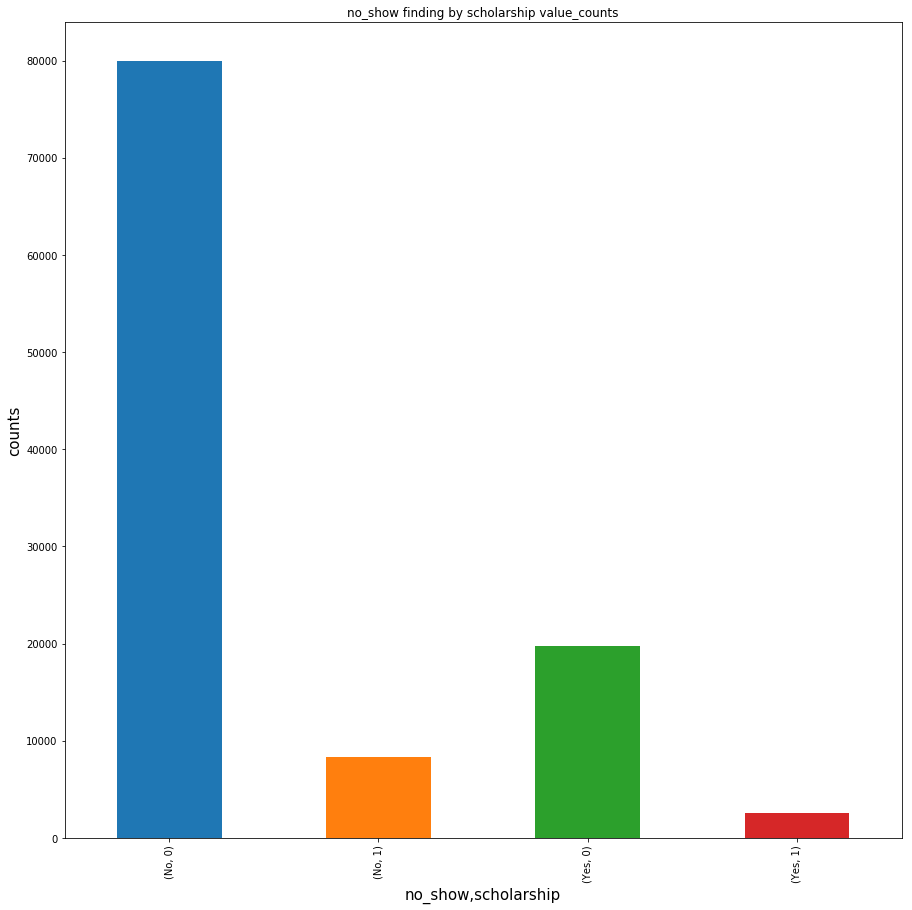

In [145]:
plot_value_counts('no_show','scholarship')

_**finding**_ count of patient without scholarship is higher in both subgroup of 'no_show' column than that of patient with scholarship in both subgroups of 'no_show' column and this most probably due higher count of patient without scholarship.

In [146]:
# expolre relation between both subgroups of 'no_show' column and value counts of hypertension,diabetes,alcohlism and handcap

In [147]:
disease=['hipertension','diabetes','alcoholism','handcap']


(hipertension  diabetes  alcoholism  handcap  no_show
0             0         0           0        No         66511
                                             Yes        17603
                                    1        No           869
                                             Yes          219
                                    2        No            84
                                             Yes           13
                                    3        No             7
                                             Yes            2
                                    4        No             2
                                             Yes            1
                        1           0        No          1506
                                             Yes          416
                                    1        No            28
                                             Yes            3
                                    2        Yes            1
                

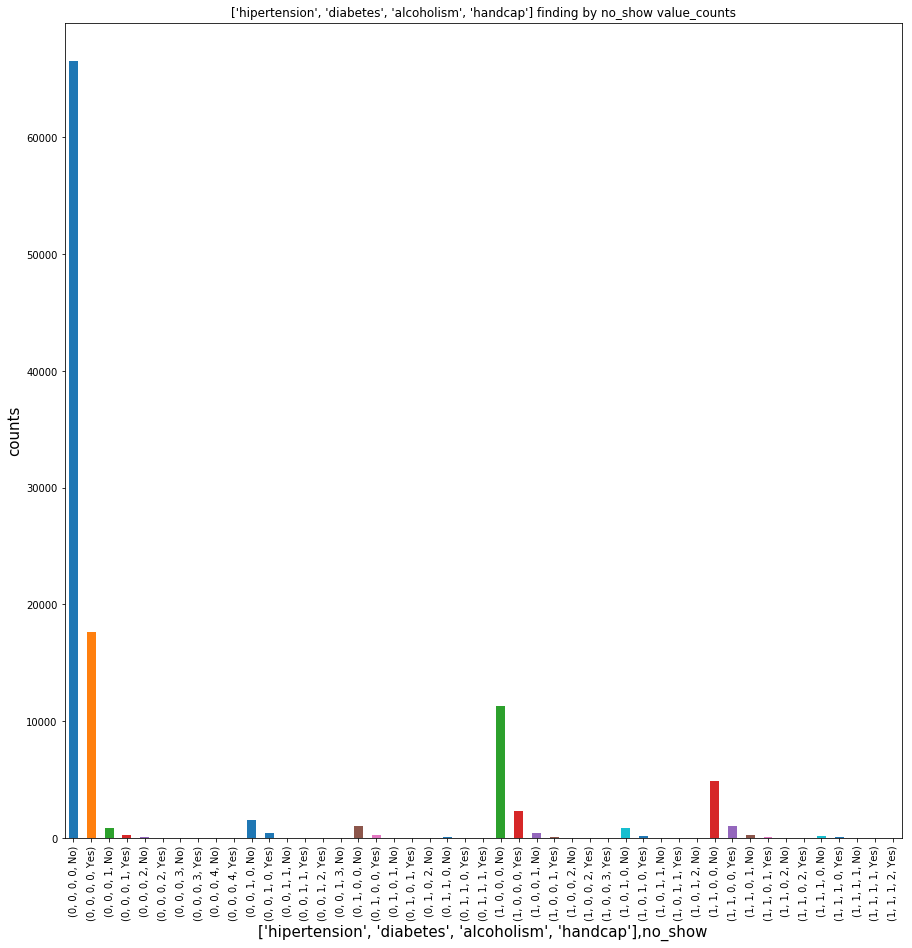

In [148]:
plot_value_counts(disease,'no_show')

_**finding**_ count of patient without hypertension,diabetes,alcoholism,handcap,both of them or any of them in both subgroups of'no_show' column is higher than that of patients with hypertension,diabetes,alcoholism,handcap,both of them or all together in both subgroups of 'no_show' column. this is most probably due to higher count of patient without any of disease than with any disease of them.

In [149]:
# compare the relation between the mean of lag time and hypertension,diabetes and alcoholism in attendance group and abscence group

In [150]:
a=attendance.groupby(['hipertension','diabetes','alcoholism'])['lag'].mean()
a

hipertension  diabetes  alcoholism
0             0         0             8.925052
                        1             5.027326
              1         0             7.695023
                        1             4.111111
1             0         0             9.070104
                        1             6.049255
              1         0             7.787342
                        1             5.457143
Name: lag, dtype: float64

In [151]:
b=abscence.groupby(['hipertension','diabetes','alcoholism'])['lag'].mean()
b

hipertension  diabetes  alcoholism
0             0         0             16.099787
                        1             13.011905
              1         0             13.452899
                        1              4.153846
1             0         0             16.014386
                        1             12.994949
              1         0             13.538813
                        1             12.217391
Name: lag, dtype: float64

In [152]:
#make dateframe for lag time in abscence and attendance grouops in relation to diseases

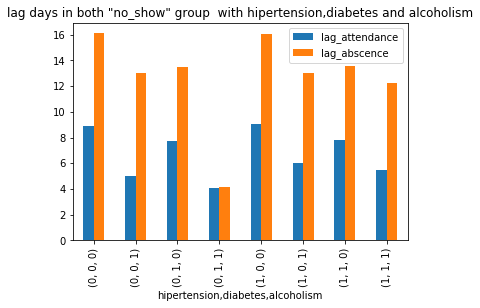

In [153]:
c=pd.concat([a,b],axis=1)
c.set_axis(['lag_attendance','lag_abscence'],axis=1,inplace=True)
c.plot(kind='bar',title='lag days in both "no_show" group  with hipertension,diabetes and alcoholism');
plt.legend();

#### finding
lag time for patient with one or more chronic medical disease is near to the lag time for patient without medical disease 

In [154]:
#make dateframe for lag time in abscence and attendance grouops in relation to handcap,sms_received,scholarship and gender

In [155]:
d=attendance.groupby(['handcap','sms_received','scholarship','gender'])['lag'].mean()
d

handcap  sms_received  scholarship  gender
0        0             0            F          5.059385
                                    M          4.499119
                       1            F          3.475403
                                    M          3.222222
         1             0            F         19.120089
                                    M         18.416894
                       1            F         16.143821
                                    M         17.532787
1        0             0            F          3.872214
                                    M          3.862782
                       1            F          2.373333
                                    M          2.333333
         1             0            F         16.346734
                                    M         20.705036
                       1            F         24.235294
                                    M         11.500000
2        0             0            F          5.245283
     

In [156]:
e=abscence.groupby(['handcap','sms_received','scholarship','gender'])['lag'].mean()
e

handcap  sms_received  scholarship  gender
0        0             0            F         12.936709
                                    M         12.555556
                       1            F         12.031365
                                    M          9.667797
         1             0            F         20.221552
                                    M         20.562390
                       1            F         17.658317
                                    M         17.086705
1        0             0            F          8.709677
                                    M          7.696078
                       1            F         12.090909
                                    M          0.666667
         1             0            F         22.855072
                                    M         17.340909
                       1            F         21.000000
2        0             0            F         14.842105
                                    M         14.900000
     

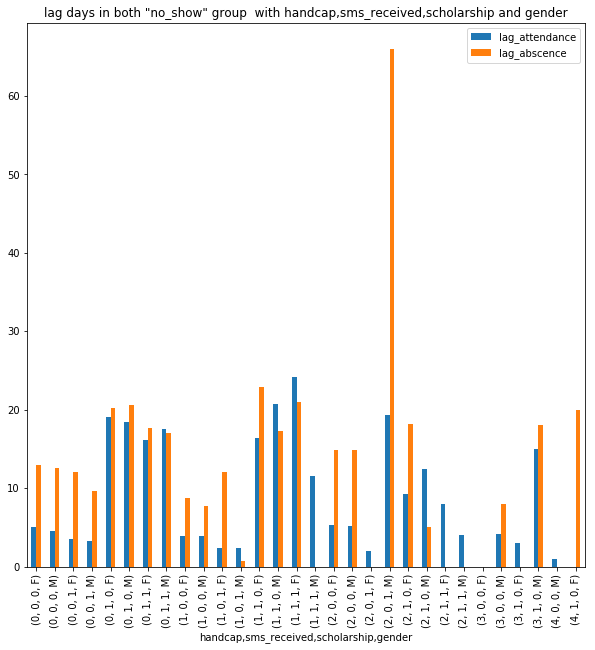

In [157]:
f=pd.concat([d,e],axis=1)
f.set_axis(['lag_attendance','lag_abscence'],axis=1,inplace=True)
f.plot(kind='bar',figsize=(10,10),title='lag days in both "no_show" group  with handcap,sms_received,scholarship and gender');
plt.legend();

_**finding**_ lag time is higher in abscence group for the majority of subgroup.

# __**conclusion**__
### results:
#####  - about of 20% of the patient did not attend to their appointment.
#####  - the appointment day giving to the patient sometimes is wrong(some patients provided appointment day preceeding their scheduled day) and mostly away from scheduled day resulting to that 50% of  lag time values is between 4 days and 179 days(these are extermly long period for patient seeking for medical advice).
##### - the mean of lag time for patients that didn't attend their appointment is 15 days and up to twice that of patient attend their appointment.
##### - hospitals with the highest total counts of appointments have the highest counts of canceled appointment.
##### - study show that among the  attendance, elder subgroup has the highest value of attendance although they have mean lag time value which is the highest among the attendance group.also,although the abscent elder group has the highest mean lag time among the abscence group, this elder group has least value of abscence.
##### -count of female in both 'no_show' subgroups is more than count of male and this most probably due to the total female pateient is higher than that of male patient.
##### although only about to 32% of patients receive SMS to confirm appointment,about 27% of them not attend and this equal to the percentage of non_attendance for patient not receive SMS.
##### -count of patient without scholarship is higher in both subgroup of 'no_show' column than that of patient with scholarship in both subgroups of 'no_show' column and this most probably due higher count of patient without scholarship.
##### - we can decrease rate of abscence for appointment through giving suitable appointment day,and distribute appointments eventually on hospitals to minimize lag time.
### limitations:
##### most of study variables are categorical which limit the extend of analysis and extracted results
##### insufficient details of some variables as:
         - distance between hospitals and patient
         - patient call for appointment is urgent or not, and how is the replying appointments
         - how the patient informed by the appointment day other than sms ,how is the response of patient to the given date


In [158]:
from subprocess import call
call(['python','-m', 'nbconvert','investigatation_dataset_noshow_appointments.ipynb'])

255